**Objective**. This notebook contains illustrating examples for the functions that are included in polyFunctions_core.sage  

In [1]:
%display typeset

In [2]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? 
Nothing done.


In [3]:
%%bash
sage --preparse './lib/polyFunctions_core.sage'
mv ./lib/polyFunctions_core.sage.py ./lib/polyFunctions_core.py 

### 1. Modeling with Polyhedra: back and forth with half-space representation 

We present examples for creating Polyhedra from matrices and conversely to obtain matrices from Polyhedra.

In [4]:
from lib.polyFunctions_core import PolyhedronFromHSpaceRep, PolyhedronToHSpaceRep

A = matrix([[-1.0, 0.0,  0.0,  0.0,  0.0,  0.0],
[ 1.0,  0.0,  0.0,  0.0,  0.0,  0.0],
[ 0.0,  1.0,  0.0,  0.0,  0.0,  0.0],
[ 0.0, -1.0,  0.0,  0.0,  0.0,  0.0],
[ 0.0,  0.0, -1.0,  0.0,  0.0,  0.0],
[ 0.0,  0.0,  1.0,  0.0,  0.0,  0.0],
[ 0.0,  0.0,  0.0, -1.0,  0.0,  0.0],
[ 0.0,  0.0,  0.0,  1.0,  0.0,  0.0],
[ 0.0,  0.0,  0.0,  0.0,  1.0,  0.0],
[ 0.0,  0.0,  0.0,  0.0, -1.0,  0.0],
[ 0.0,  0.0,  0.0,  0.0,  0.0,  1.0],
[ 0.0,  0.0,  0.0,  0.0,  0.0, -1.0]])

b = vector([0.0, 10.0, 0.0, 0.0, 0.2, 0.2, 0.1, 0.1, 0.0, 0.0, 0.0, 0.0])

P = PolyhedronFromHSpaceRep(A, b); P

A 3-dimensional polyhedron in QQ^6 defined as the convex hull of 8 vertices

In [5]:
P.inequalities()

(An inequality (1, 0, 0, 0, 0, 0) x + 0 >= 0,
 An inequality (0, 0, -5, 0, 0, 0) x + 1 >= 0,
 An inequality (0, 0, 5, 0, 0, 0) x + 1 >= 0,
 An inequality (0, 0, 0, 10, 0, 0) x + 1 >= 0,
 An inequality (0, 0, 0, -10, 0, 0) x + 1 >= 0,
 An inequality (-1, 0, 0, 0, 0, 0) x + 10 >= 0)

In [6]:
P.equations()

(An equation (0, 0, 0, 0, 0, 1) x + 0 == 0,
 An equation (0, 0, 0, 0, 1, 0) x + 0 == 0,
 An equation (0, 1, 0, 0, 0, 0) x + 0 == 0)

In [7]:
[A, b, Aeq, beq] = PolyhedronToHSpaceRep(P, separate_equality_constraints = True)

In [8]:
A, b

(
[ -1.0   0.0   0.0   0.0   0.0   0.0]                                 
[  0.0   0.0   5.0   0.0   0.0   0.0]                                 
[  0.0   0.0  -5.0   0.0   0.0   0.0]                                 
[  0.0   0.0   0.0 -10.0   0.0   0.0]                                 
[  0.0   0.0   0.0  10.0   0.0   0.0]                                 
[  1.0   0.0   0.0   0.0   0.0   0.0], (0.0, 1.0, 1.0, 1.0, 1.0, 10.0)
)

In [9]:
Aeq, beq

(
[ 0.0  0.0  0.0  0.0  0.0 -1.0]                 
[ 0.0  0.0  0.0  0.0 -1.0  0.0]                 
[ 0.0 -1.0  0.0  0.0  0.0  0.0], (0.0, 0.0, 0.0)
)

### 2. Generating polyhedra

#### 2.1. Ball in the infinity (sup) norm specifying the center and radius

In [10]:
from lib.polyFunctions_core import BoxInfty

In [11]:
P = BoxInfty(center=[1,2,3], radius=0.1); P.plot(aspect_ratio=1)

Graphics3d Object

As a side note, the function also works when the arguments are not named, as in

```
P = BoxInfty([1,2,3], 0.1); P.plot(aspect_ratio=1)
```


#### 2.2. Box in the infinity (sup) norm specifying the lengths of the sides

/Users/forets/Tools/sage-master/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


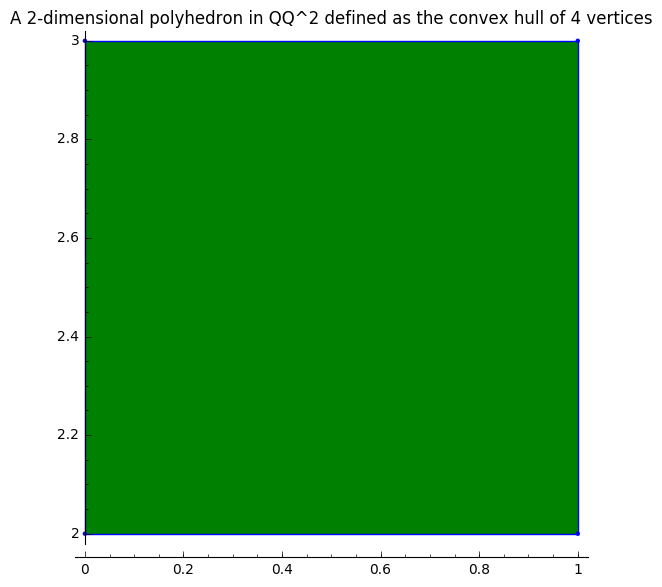

In [12]:
P = BoxInfty([[0,1], [2,3]]); P

#### 2.3. Random polyhedra

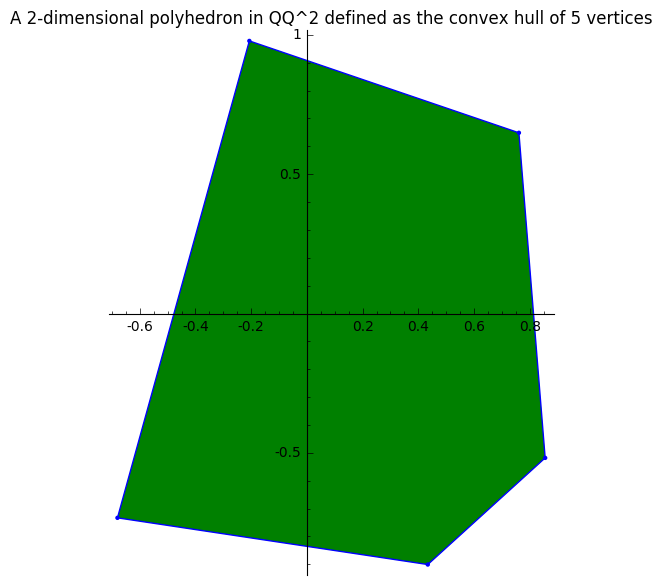

In [13]:
from lib.polyFunctions_core import random_polygon_2d

random_polygon_2d(5)

#### 2.4. Opposite polyhedron

In [14]:
from lib.polyFunctions_core import BoxInfty, opposite_polyhedron

P = BoxInfty([1,1], 0.5);
mp = opposite_polyhedron(P);

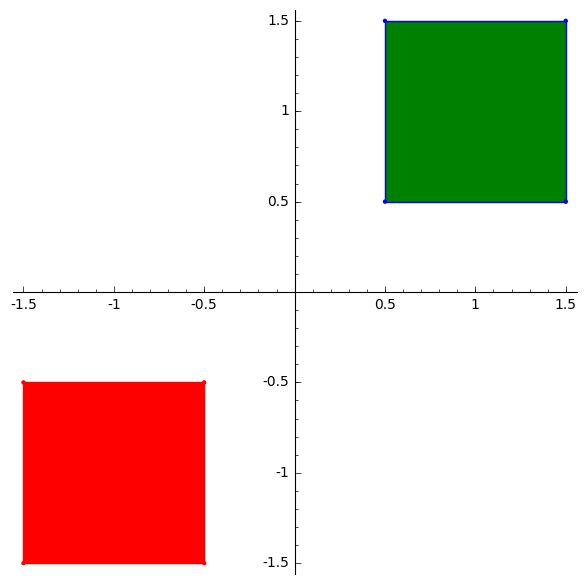

In [15]:
P.plot(aspect_ratio=1) + mp.plot(color='red')

### 3. Support function, linear maps, and related functions

#### 3.1. Support function of a polytope

In [16]:
from lib.polyFunctions_core import *

P = BoxInfty([1,2,3,4,5], 1); P
supp_fun_polyhedron(P, [1,-1,1,-1,1], verbose=1)

**** Solve LP  ****
Maximization:
  x_0 - x_1 + x_2 - x_3 + x_4 

Constraints:
  x_0 <= 2.0
  x_1 <= 3.0
  x_2 <= 4.0
  x_3 <= 5.0
  x_4 <= 6.0
  - x_0 <= 0.0
  - x_4 <= -4.0
  - x_3 <= -3.0
  - x_2 <= -2.0
  - x_1 <= -1.0
Variables:
  x_0 is a continuous variable (min=-oo, max=+oo)
  x_1 is a continuous variable (min=-oo, max=+oo)
  x_2 is a continuous variable (min=-oo, max=+oo)
  x_3 is a continuous variable (min=-oo, max=+oo)
  x_4 is a continuous variable (min=-oo, max=+oo)
Objective Value: 8.0
x_0 = 2.000000
x_1 = 1.000000
x_2 = 4.000000
x_3 = 3.000000
x_4 = 6.000000




8.0

It is also possible to input the polyhedron in matrix form, $[A, b]$. If this is possible, it is preferable, since it is often faster. Below is an example with $12$ variables. We get beteen 3x and 4x improvement in the second case. 

In [17]:
reset('P, A, b')
P = BoxInfty([1,2,3,4,5,6,7,8,9,10,11,12], 1); P
[A, b] = PolyhedronToHSpaceRep(P)

In [18]:
timeit('supp_fun_polyhedron(P, [1,-1,1,-1,1,-1,1,-1,1,-1,1,-1])')

125 loops, best of 3: 1.71 ms per loop


In [19]:
timeit('supp_fun_polyhedron([A, b], [1,-1,1,-1,1,-1,1,-1,1,-1,1,-1])')

AttributeError: 'list' object has no attribute 'is_empty'

In [20]:
1.58e-3/433e-6

3.64896073903002

#### 3.2. Support function of an ellipsoid

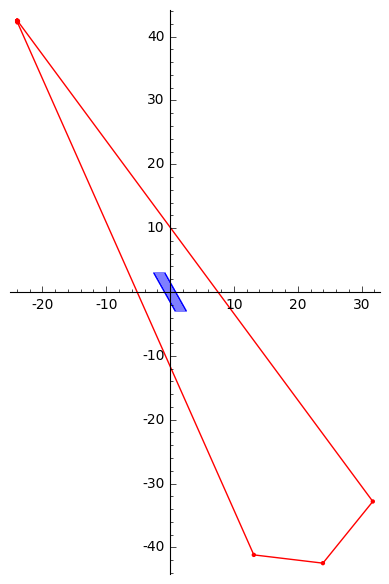

In [19]:
from lib.polyFunctions_core import supp_fun_polyhedron, supp_fun_ellipsoid 
import random

# Generate a random ellipsoid and check support function outer approximation.
# Define an ellipse as: x^T*Q*x <= 1
M = random_matrix(RR, 2, distribution="uniform")
Q = M.T*M
f = lambda x, y : Q[0,0]*x^2 + Q[1,1]*y^2 + (Q[0,1]+Q[1,0])*x*y-1
E = implicit_plot(f,(-5,5),(-3,3),fill=True,alpha=0.5,plot_points=600)

# generate at random k directions, and compute the overapproximation of E using support functions
# It works 'in average': we might get unbounded domains (random choice did not enclose the ellipsoid).
# It is recommended to use QQ as base_ring to avoid 'frozen set' issues.
k=15
A = matrix(RR,k,2); b = vector(RR,k)
for i in range(k):
    theta = random.uniform(0, 2*pi.n(digits=5))
    d = vector(RR,[cos(theta), sin(theta)])
    s_fun = supp_fun_ellipsoid(Q, d)
    A.set_row(i,d); b[i] = s_fun

OmegaApprox = PolyhedronFromHSpaceRep(A, b, base_ring = QQ)
E + OmegaApprox.plot(fill=False, color='red')

#### 3.3. Supremum norm of a polyhedron

In [17]:
from lib.polyFunctions_core import BoxInfty, polyhedron_sup_norm

In [18]:
P = BoxInfty([-13,24,-51,18.54,309],27.04);
polyhedron_sup_norm(P)

8401/25

In [19]:
got_lengths, got_center_and_radius = False, False

In [20]:
got_lengths is not False

False

In [21]:
poly_sup_norm(PolyhedronToHSpaceRep(P))

NameError: name 'poly_sup_norm' is not defined

In [22]:
8401/25.N()

/Users/forets/Tools/sage-master/local/lib/python2.7/site-packages/sage/repl/ipython_kernel/__main__.py:1: DeprecationWarning: N is deprecated. Please use n instead.
See http://trac.sagemath.org/13055 for details.
  from ipykernel.kernelapp import IPKernelApp


336.040000000000

Consider a higher-dimensional system. We obtain almost a 200x improvement for a 15-dimensional set. This is because in the case we call ```poly_sup_norm``` with a polytope, the ```bounding_box()``` function consumes time. 

For a 20-dimensional set, the polyhedron construct does not finish. 

In [23]:
%%time 
P = BallInfty([1,1,1,1,1,1,1,1,1,1,1,1,1,1,1], 14.28);
poly_sup_norm(P)

NameError: name 'BallInfty' is not defined

In [24]:
%%time 
[A, b] = BallInfty([1,1,1,1,1,1,1,1,1,1,1,1,1,1,1], 14.28, base_ring = RDF, return_HSpaceRep = True)
poly_sup_norm([A, b])

NameError: name 'BallInfty' is not defined

In [25]:
3.87/19.6e-3

197.448979591837

#### 3.4. Linear map of a polyhedron

In [26]:
from lib.polyFunctions_core import polyhedron_linear_map, BoxInfty

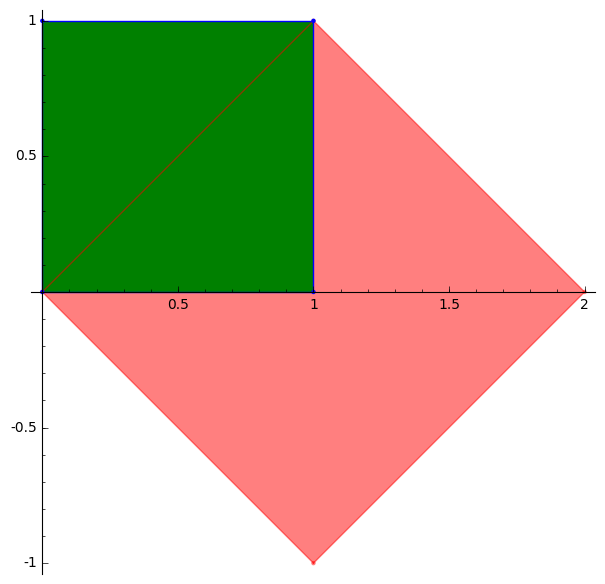

In [27]:
U = BoxInfty([[0,1],[0,1]])
B = matrix([[1,1],[1,-1]])
P = polyhedron_linear_map(B, U)
P.plot(color='red', alpha=0.5) + U.plot()

#### 3.5. Chebyshev center

/Users/forets/Tools/sage-master/local/lib/python2.7/site-packages/sage/repl/ipython_kernel/__main__.py:12: DeprecationWarning: N is deprecated. Please use n instead.
See http://trac.sagemath.org/13055 for details.
/Users/forets/Tools/sage-master/local/lib/python2.7/site-packages/sage/repl/ipython_kernel/__main__.py:13: DeprecationWarning: N is deprecated. Please use n instead.
See http://trac.sagemath.org/13055 for details.


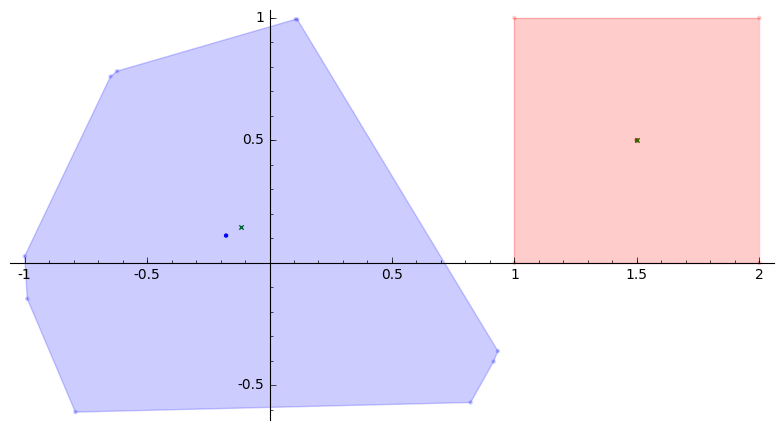

In [28]:
from lib.polyFunctions_core import chebyshev_center, BoxInfty, random_polygon_2d

P = random_polygon_2d(10, base_ring = QQ)
c = chebyshev_center(P); 

B = BoxInfty([[1,2],[0,1]])
b = chebyshev_center(B)

fig = point(c, color='blue') + P.plot(color='blue', alpha=0.2)
fig += point(b, color='red') + B.plot(color='red', alpha=0.2)

fig += point(P.center().N(), color='green',marker='x')
fig += point(B.center().N(), color='green',marker='x')

fig

The method ```center()``` existent in the Polyhedra class, computes the average of the vertices. In contrast, the Chebyshev center is the center of the largest box enclosed by the polytope.

In [20]:
B.bounding_box()

((1, 0), (2, 1))

In [21]:
P.bounding_box()

((-919/1534, -1893/1903), (2413/2414, 1074/1139))

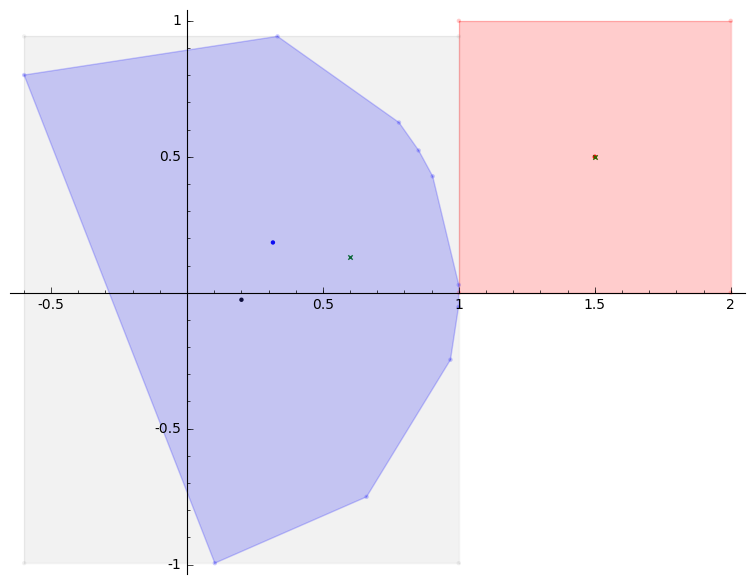

In [22]:
e = [ (P.bounding_box()[0][0] + P.bounding_box()[1][0])/2, (P.bounding_box()[0][1] + P.bounding_box()[1][1])/2]
l = [[P.bounding_box()[0][0], P.bounding_box()[1][0]], [P.bounding_box()[0][1], P.bounding_box()[1][1]] ]

fig += point(e,color='black') + BoxInfty(lengths=l).plot(alpha=0.1,color='grey')

fig

Here we have added in grey the bounding box that is obtained from the method ```bounding_box()```. To make the picture complete, we should also add the box of center Cheby center, and of maximal radius which is included in it.

# Projections

In [1]:
from lib.projections import lotov_algo
from lib.polyFunctions_core import PolyhedronFromHSpaceRep, PolyhedronToHSpaceRep

A = matrix([[-1.0, 0.0,  0.0,  0.0,  0.0,  0.0],
[ 1.0,  0.0,  0.0,  0.0,  0.0,  0.0],
[ 0.0,  1.0,  0.0,  0.0,  0.0,  0.0],
[ 0.0, -1.0,  0.0,  0.0,  0.0,  0.0],
[ 0.0,  0.0, -1.0,  0.0,  0.0,  0.0],
[ 0.0,  0.0,  1.0,  0.0,  0.0,  0.0],
[ 0.0,  0.0,  0.0, -1.0,  0.0,  0.0],
[ 0.0,  0.0,  0.0,  1.0,  0.0,  0.0],
[ 0.0,  0.0,  0.0,  0.0,  1.0,  0.0],
[ 0.0,  0.0,  0.0,  0.0, -1.0,  0.0],
[ 0.0,  0.0,  0.0,  0.0,  0.0,  1.0],
[ 0.0,  0.0,  0.0,  0.0,  0.0, -1.0]])

b = vector([0.0, 10.0, 0.0, 0.0, 0.2, 0.2, 0.1, 0.1, 0.0, 0.0, 0.0, 0.0])

P = PolyhedronFromHSpaceRep(A, b); P

A 3-dimensional polyhedron in QQ^6 defined as the convex hull of 8 vertices (use the .plot() method to plot)

In [2]:
lotov_algo(A, b, [1,0,0], [0,1,0], 0.5)

[[(0, 0), (0, 0), (10, 0), (10, 0)],
 [(0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (10.0, 0.0)]]

## Application: to check if a polyhedron is empty

### Loading data from a MAT file

In [20]:
import scipy 
from scipy import io

data = scipy.io.loadmat('./res/data_polyhedron_AR.mat')

A = data['A']; b = data['b']

# for some reason, the vector is loaded as an array of arrays (of length 1)
b = [bi[0] for bi in b];

## Computation in the rationals with PPL

Let's try it with `polyFunctions` library. It is designed to accept both Sage matrices and Numpy arrays. 

In [21]:
from lib.polyFunctions_core import PolyhedronFromHSpaceRep, PolyhedronToHSpaceRep

In [22]:
# with PPL, in rational field (default is rationals)
P = PolyhedronFromHSpaceRep(A, b); P

The empty polyhedron in QQ^6 (use the .plot() method to plot)

For sanity check, below we write the explicit code that is executed in `PolyhedronFromHSpaceRep`. The result obtained is the same.

In [14]:
A.shape, len(b)

((32, 6), 32)

In [15]:
%%time

# avec PPL dans l'anneau QQ:

b_QQ = vector(QQ, 32)

for i in range(32):
    b_QQ[i] = QQ(b[i])

A_QQ = matrix(QQ, 32, 6)

for i in range(32):
    A_QQ.set_row(i, [QQ(A[i][j]) for j in range(6)]) 


ambient_dim = A_QQ.ncols()
ieqs_list = []
for i in range(A_QQ.nrows()):
    ieqs_list.append(list(-A_QQ.row(i)))  #change in sign, necessary since Polyhedron receives Ax+b>=0
    ieqs_list[i].insert(0,b_QQ[i])   
     
P = Polyhedron(ieqs = ieqs_list, base_ring=QQ, 
               ambient_dim=A_QQ.ncols(), backend='ppl')

CPU times: user 9.84 ms, sys: 1.07 ms, total: 10.9 ms
Wall time: 10.2 ms


In [16]:
P.is_empty()

True

## Computation in the real double field with CDD

Let's try it with `polyFunctions` library. The difference is that now we should specify the base ring. 

In [17]:
# with CDD
P = PolyhedronFromHSpaceRep(A, b, base_ring=RDF); P

The empty polyhedron in RDF^6 (use the .plot() method to plot)

For sanity check, below we write the explicit code that is executed in `PolyhedronFromHSpaceRep`. The result obtained is the same.

In [19]:
%%time

# avec CDD dans l'anneau RDF:

b_RDF = vector(RDF, 32)

for i in range(32):
    b_RDF[i] = RDF(b[i])

A_RDF = matrix(RDF, 32, 6)

for i in range(32):
    A_RDF.set_row(i, [RDF(A[i][j]) for j in range(6)]) 


ambient_dim = A_RDF.ncols()
ieqs_list = []
for i in range(A_RDF.nrows()):
    ieqs_list.append(list(-A_RDF.row(i)))  #change in sign, necessary since Polyhedron receives Ax+b>=0
    ieqs_list[i].insert(0,b_RDF[i])   
     
P = Polyhedron(ieqs = ieqs_list, base_ring=RDF, 
               ambient_dim=A_RDF.ncols(), backend='cdd')

CPU times: user 4.21 ms, sys: 7.78 ms, total: 12 ms
Wall time: 16.1 ms


In [20]:
P.is_empty()    

True

In [1]:
R = get_ipython()

In [2]:
R.filename

u'<ipython console>'